<a href="https://colab.research.google.com/github/jposyluzny/ENEL645/blob/main/Lectures/Week%202/DifferentApproachesTFandKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Data Exploration

In [62]:
# load the dataset and return to the defined variable

dataset = load_iris()
# data
# target
# target_names
# DESCR

In [63]:
print(dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [64]:
dframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dframe['labels'] = dataset.target.astype(int)
dframe['label_names'] = dframe.labels.replace(dict(enumerate(dataset.target_names)))

In [65]:
dframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [66]:
dframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [67]:
# Extract features and labels from dataset

X = np.asarray(dframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
y = np.asarray(dframe['labels'])

# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)

X = X[indexes,:]
y = y[indexes]

# Split data into train/val/test sets
train_split = np.int(0.5*y.size) # 75 samples
val_split = np.int(0.75*y.size) # 112 samples

X_train = X[:train_split,:]
y_train = y[:train_split]

X_val = X[train_split:val_split,:]
y_val = y[train_split:val_split]

X_test = X[val_split:,:]
y_test = y[val_split:]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(75, 4)
(37, 4)
(38, 4)


# Data Normalization

In [68]:
# min-max data normalization

print(X_train[0])
X_train_min = X_train.min(axis=0, keepdims=True)
X_train_max = X_train.max(axis=0, keepdims=True)
X_train = (X_train - X_train_min)/(X_train_max - X_train_min)
X_val = (X_val - X_train_min)/(X_train_max - X_train_min)
X_test = (X_test - X_train_min)/(X_train_max - X_train_min)

print(X_train[0])

[6.4 3.1 5.5 1.8]
[0.59375    0.45833333 0.75438596 0.70833333]


##**Representing Labels using one-hot-encoding**

In [69]:
k = np.unique(y).size
y_oh_train = to_categorical(y_train, k)
y_oh_val = to_categorical(y_val, k)
y_oh_test = to_categorical(y_test, k)

# displaying first 5 elements
print(y_train[:5])
print()
print(y_oh_train[:5])

[2 0 1 0 2]

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


#Different Approaches for Defining Neural Networks

## 1. The Sequential API

In [70]:
from tensorflow.keras.models import Sequential
# Passing a list of layers to the constructor
model_seq = Sequential([
      tf.keras.layers.Dense(5, activation='relu', input_shape=(4,), name='layer1'),
      tf.keras.layers.Dense(10, activation='relu', name='layer2'),
      tf.keras.layers.Dense(3, activation='softmax', name='layer3'),
])

model_seq.summary()

# We can also add layers line by line
# model_seq = Sequential()
# model_seq.add(Dense(5, activation='relu', input_shape=(4,)))
# model_seq.add(Dense(10, activation='relu'))
# model_seq.add(Dense(3, activation='softmax'))
# model_seq.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 5)                 25        
_________________________________________________________________
layer2 (Dense)               (None, 10)                60        
_________________________________________________________________
layer3 (Dense)               (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [71]:
model_seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # compile the model
# train the model
history = model_seq.fit(X_train, y_oh_train, validation_data=(X_val, y_oh_val), batch_size = 64, epochs=100)  # batch size dictates the amount of samples that the model trains on at one time

Epoch 1/100
2/2 [==============================] - 1s 173ms/step - loss: 1.0458 - accuracy: 0.3828 - val_loss: 1.1217 - val_accuracy: 0.3243
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 1.0420 - accuracy: 0.3776 - val_loss: 1.1184 - val_accuracy: 0.3514
Epoch 3/100
2/2 [==============================] - 0s 37ms/step - loss: 1.0256 - accuracy: 0.3932 - val_loss: 1.1145 - val_accuracy: 0.3784
Epoch 4/100
2/2 [==============================] - 0s 37ms/step - loss: 1.0260 - accuracy: 0.3880 - val_loss: 1.1099 - val_accuracy: 0.3784
Epoch 5/100
2/2 [==============================] - 0s 54ms/step - loss: 1.0256 - accuracy: 0.3828 - val_loss: 1.1050 - val_accuracy: 0.4324
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 1.0182 - accuracy: 0.4021 - val_loss: 1.1000 - val_accuracy: 0.4595
Epoch 7/100
2/2 [==============================] - 0s 37ms/step - loss: 1.0196 - accuracy: 0.4058 - val_loss: 1.0951 - val_accuracy: 0.4865
Epoch 8/100
2/2 [==

Test loss (cross-entropy and accuracy): [0.8720197081565857, 0.5789473652839661]

Layer 0
Bias:
 [ 0.         -0.04845308  0.         -0.0817865   0.08427341]
W:
 [[ 0.70791256 -0.00425244 -0.49131078  0.46354473 -0.11245868]
 [-0.5282679  -0.5532607   0.03533983  0.06710651 -0.26890087]
 [-0.66661316  0.8108859   0.1953814   0.46717814  0.61462826]
 [-0.22937942  0.34822494 -0.4833948   0.79559106  0.8723517 ]]

Layer 1
Bias:
 [-0.1223076   0.11948921  0.1168467   0.          0.         -0.1259662
 -0.05584496  0.         -0.08274362  0.        ]
W:
 [[ 0.14790952  0.1601004   0.4016865   0.22177464  0.5784331   0.5128557
   0.1557498   0.40637273  0.35535663 -0.14862788]
 [ 0.611637    0.47662058 -0.57765114 -0.17050391 -0.47401035  0.06933489
   0.468789    0.41584975  0.47594973 -0.56804204]
 [-0.2088781  -0.09930205  0.5243649  -0.5479459  -0.25281852 -0.05877203
   0.11006248  0.29979038 -0.01853424 -0.16866475]
 [ 0.4642489   0.43638003  0.4868537  -0.00719327 -0.22975877  0.416

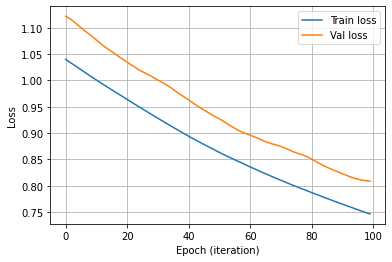

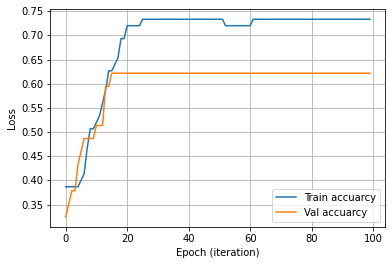

In [72]:
loss = model_seq.evaluate(X_test, y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model_seq.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

## 2. The Functional API

In [73]:
from tensorflow.keras.models import Model

input_tensor = tf.keras.layers.Input(shape=(4,)) # this returns a tensor, shape is (4,) becase we have 4 features

# A layer instance is callable on a tensor, and returns a tensor
x1 = tf.keras.layers.Dense(5, activation='relu')(input_tensor)
x2 = tf.keras.layers.Dense(10, activation='relu')(x1)
out_tensor = tf.keras.layers.Dense(3, activation = 'softmax')(x2)

model = Model(inputs=input_tensor, outputs=out_tensor) # this creates a model that includes the Input layer and three Dense layers
model.summary() 

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## 3. Model Subclassing

In [74]:
class MyNeuralNetwork(Model):
  def __init__(self, **kwargs):
    super(MyNeuralNetwork, self).__init__(**kwargs)
    self.dense1 = tf.keras.layers.Dense(5, activation='relu', )
    self.dense2 = tf.keras.layers.Dense(10, activation='relu')
    self.dense3 = tf.keras.layers.Dense(3, activation='softmax')

  def call(self, inputs):
    x1 = self.dense1(inputs)
    x2 = self.dense2(x1)
    out_tensor = self.dense3(x2)
    return out_tensor

model = MyNeuralNetwork()
model.build(input_shape = (None, 4))
model.summary()

Model: "my_neural_network_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  25        
_________________________________________________________________
dense_13 (Dense)             multiple                  60        
_________________________________________________________________
dense_14 (Dense)             multiple                  33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Training and Testing the Model

In [76]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # compiles the model

In [80]:
history = model.fit(X_train, y_oh_train, validation_data = (X_val, y_oh_val), batch_size = 64, epochs=300)

Epoch 1/300
2/2 [==============================] - 0s 242ms/step - loss: 0.9365 - accuracy: 0.7333 - val_loss: 0.9891 - val_accuracy: 0.6216
Epoch 2/300
2/2 [==============================] - 0s 49ms/step - loss: 0.9338 - accuracy: 0.7333 - val_loss: 0.9868 - val_accuracy: 0.6216
Epoch 3/300
2/2 [==============================] - 0s 41ms/step - loss: 0.9306 - accuracy: 0.7333 - val_loss: 0.9844 - val_accuracy: 0.6216
Epoch 4/300
2/2 [==============================] - 0s 39ms/step - loss: 0.9278 - accuracy: 0.7333 - val_loss: 0.9820 - val_accuracy: 0.6216
Epoch 5/300
2/2 [==============================] - 0s 38ms/step - loss: 0.9248 - accuracy: 0.7333 - val_loss: 0.9795 - val_accuracy: 0.6216
Epoch 6/300
2/2 [==============================] - 0s 40ms/step - loss: 0.9218 - accuracy: 0.7333 - val_loss: 0.9769 - val_accuracy: 0.6216
Epoch 7/300
2/2 [==============================] - 0s 43ms/step - loss: 0.9188 - accuracy: 0.7333 - val_loss: 0.9744 - val_accuracy: 0.6216
Epoch 8/300
2/2 [==

Test loss (cross-entropy and accuracy): [0.347115159034729, 0.8421052694320679]

Layer 0
Bias:
 [0.         0.         0.59030986 0.         0.17076395]
W:
 [[ 0.2086469  -0.7783637  -0.34089953 -0.66535234  0.85273063]
 [-0.5519125  -0.4316147   0.39817172 -0.40304095 -0.35207993]
 [-0.00954926  0.5366752  -0.5837865   0.26688898  0.7955787 ]
 [-0.3756352  -0.4055798  -0.07405651 -0.07189709  0.6291378 ]]

Layer 1
Bias:
 [ 0.01320883  0.          0.04079803  0.          0.          0.3451386
  0.2653844   0.47616524  0.1973562  -0.10501691]
W:
 [[-0.26485857  0.44572228  0.09529769 -0.45230335 -0.5786802  -0.18781888
   0.04956108 -0.3934291   0.57818776 -0.4032307 ]
 [ 0.20767087 -0.44438618  0.54172236 -0.08910143  0.4609391  -0.4759109
   0.08721584  0.52760094  0.24427086  0.42345554]
 [ 1.1740848  -0.11896646 -0.72720015 -0.43470097 -0.39189857 -0.37207726
   1.2192674   1.5914712   1.1240089  -0.6036189 ]
 [ 0.2659257   0.35110784  0.6180256   0.42944914  0.40581232 -0.505685
  

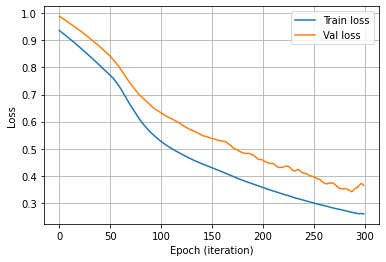

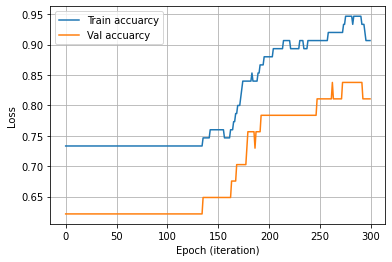

In [82]:
loss = model.evaluate(X_test, y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()